In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge

file_path = r'C:\Users\Pragna\OneDrive\Desktop\ML_Hourly_data\multiple regression\regression\BTM_hourlyy.csv'
df= pd.read_csv(file_path)

In [14]:


# Assuming df is your DataFrame
df = df.apply(pd.to_numeric, errors='coerce')
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

if not non_numeric_columns.empty:
    print("Columns with non-numeric values:", non_numeric_columns)
else:
    print("No columns with non-numeric values.")



No columns with non-numeric values.


In [16]:

df.isna().sum()

PM2.5           455
PM10           5712
NO             5453
NO2            5428
NOx            5428
NH3            5447
SO2            5506
CO             5428
Ozone          5439
Benzene        5430
Toluene        5430
Eth-Benzene    5430
MP-Xylene      5430
RH             5429
WS             6655
WD             6655
SR             5565
BP             5451
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df.dtypes)


PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
SO2            float64
CO             float64
Ozone          float64
Benzene        float64
Toluene        float64
Eth-Benzene    float64
MP-Xylene      float64
RH             float64
WS             float64
WD             float64
SR             float64
BP             float64
dtype: object


In [24]:
print("Infinite values:", np.any(np.isinf(df)))
print("NaN values:", np.any(np.isnan(df)))
print("Before imputation:\n", df.head())


Infinite values: False
NaN values: True
Before imputation:
    PM2.5   PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0  26.16  51.35  12.02  15.63  36.59  11.20  14.36  0.74  27.03     0.41   
1  28.46  56.15  12.37  15.70  35.90  11.19  13.82  0.74  27.23     0.43   
2  23.87  46.53  11.68  16.48  36.20  11.37  13.56  0.74  27.98     0.41   
3  26.49  52.02  12.07  15.87  37.06  11.33  12.32  0.74  27.30     0.41   
4  24.66  48.19  11.80  16.07  35.90  11.57  12.73  0.74  27.34     0.41   

   Toluene  Eth-Benzene  MP-Xylene     RH  WS  WD     SR      BP  
0     1.43         1.68       0.91  82.03 NaN NaN  24.84  775.05  
1     1.45         1.69       0.87  87.23 NaN NaN  23.62  775.00  
2     1.46         1.65       0.89  89.23 NaN NaN  22.83  775.00  
3     1.44         1.71       0.86  89.25 NaN NaN  23.75  775.00  
4     1.47         1.69       0.89  89.25 NaN NaN  24.12  775.02  


In [29]:

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("After imputation:\n", df_imputed.head())


After imputation:
    PM2.5   PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0  26.16  51.35  12.02  15.63  36.59  11.20  14.36  0.74  27.03     0.41   
1  28.46  56.15  12.37  15.70  35.90  11.19  13.82  0.74  27.23     0.43   
2  23.87  46.53  11.68  16.48  36.20  11.37  13.56  0.74  27.98     0.41   
3  26.49  52.02  12.07  15.87  37.06  11.33  12.32  0.74  27.30     0.41   
4  24.66  48.19  11.80  16.07  35.90  11.57  12.73  0.74  27.34     0.41   

   Toluene  Eth-Benzene  MP-Xylene     RH        WS          WD     SR      BP  
0     1.43         1.68       0.91  82.03  0.868492  228.295308  24.84  775.05  
1     1.45         1.69       0.87  87.23  0.868492  228.295308  23.62  775.00  
2     1.46         1.65       0.89  89.23  0.868492  228.295308  22.83  775.00  
3     1.44         1.71       0.86  89.25  0.868492  228.295308  23.75  775.00  
4     1.47         1.69       0.89  89.25  0.868492  228.295308  24.12  775.02  


In [43]:
df_imputed.isna().sum()


PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Toluene        0
Eth-Benzene    0
MP-Xylene      0
RH             0
WS             0
WD             0
SR             0
BP             0
dtype: int64

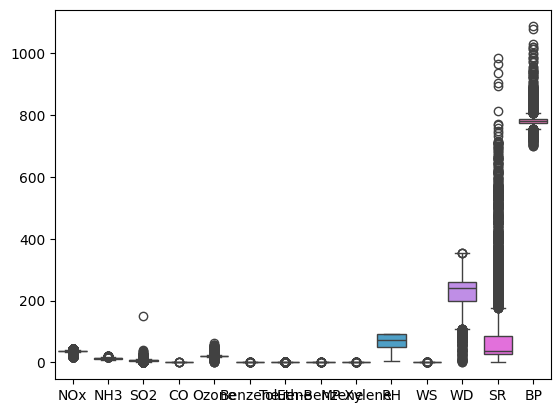

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example box plot
sns.boxplot(data=df)
plt.show()


In [72]:
x = df_imputed.drop('PM2.5', axis=1)
y = df_imputed['PM2.5']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [37]:
reg=LinearRegression().fit(x_train_std,y_train)
reg.score(x_train_std,y_train)


0.4350774905999125

In [41]:
reg.score(x_test_std,y_test)

0.6532963845290248

In [96]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=100,max_iter=10,tol=0.4)
lasso_reg.fit(x_train_std,y_train)

Lasso(alpha=100, max_iter=10, tol=0.4)

In [97]:
lasso_reg.score(x_test_std,y_test)

-0.0002639854202561853

In [98]:
lasso_reg.score(x_train_std,y_train)

0.0

In [99]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=100,max_iter=10,tol=0.4)
ridge_reg.fit(x_test_std,y_test)

Ridge(alpha=100, max_iter=10, tol=0.4)

In [100]:
ridge_reg.score(x_test_std,y_test)

0.47486843231994613

In [101]:
ridge_reg.score(x_train_std,y_train)

0.4444048187653359